# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

AxesSubplot(0.125,0.125;0.775x0.755) 

   BPXDI1  BPXDI2
0    70.0    64.0
1    88.0    88.0
2    46.0    44.0
3    72.0    68.0
4    70.0    54.0 



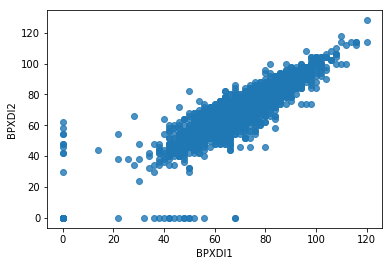

In [66]:
# enter your code here
print(sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False), "\n")
print(da.loc[:,["BPXDI1", "BPXDI2"]].head(),"\n")

In [67]:
print(da.loc[:, ["BPXDI1", "BPXDI2"]].dropna().corr(),"\n")
print(da.loc[:, ["BPXSY1", "BPXSY2"]].dropna().corr())

#print(da.loc[da.RIAGENDRx=="Male", ["BMXLEG", "BMXARML"]].dropna().corr())

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000 

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

they are positive correlate it seems, therefore are strong correlate

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

More positive correlate than the diastolic blood

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

In [69]:
# insert your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mex Am", 2: "Other Hisp", 3: "N Hisp W", 4: "N Hisp B", 5: "Other "}) 

_ = sns.FacetGrid(da, col="RIDRETH1x",  row="RIAGENDRx").map(plt.scatter, "BPXDI1", "BPXSY1", alpha=0.5).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

AxesSubplot(0.125,0.125;0.775x0.755)


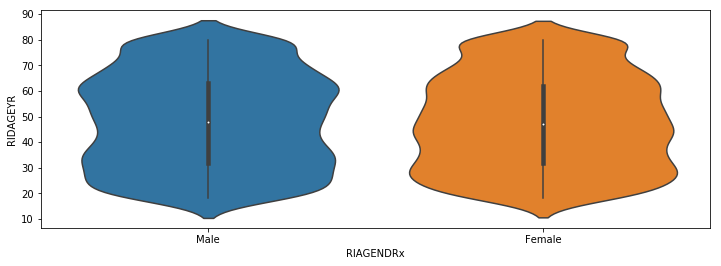

In [91]:
# insert your code here
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
plt.figure(figsize=(12, 4))
a = sns.violinplot(da.RIAGENDRx, da.RIDAGEYR )
print(a)

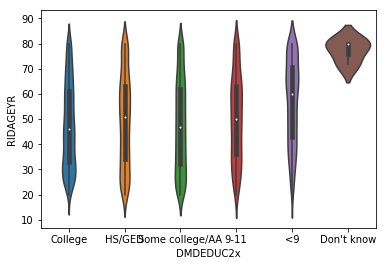

In [79]:
a = sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR )

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [ ]:
# insert your code here

__Q5a.__ Comment on the trends in BMI across the demographic groups.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [119]:
# insert your code here
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"})
da["HIQ210x"].head(10)
db = da.loc[ (da.HIQ210x != "Don't know") & (da.RIDRETH1x), :]
db.head(5)

SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  \
0       1.0       5.0  ...    27.8    43.3     43.6     35.9     101.1   
1       2.0       3.0  ...    30.8    38.0     40.0     33.2     107.9   
2       1.0       3.0  ...    28.8    35.6     37.0     31.0     116.5   
3       1.0       5.0  ...    42.4    38.5     37.7     38.3     110.1   
4       1.0       4.0  ...    20.3    37.4     36.0     27.2      80.4   

   HIQ210  RIAGENDRx  RIDRETH1x        DMDEDUC2x  HIQ210x  
0     2.0       Male   N Hisp W          College       No  
1     NaN       Male   N Hisp W           HS/GED      NaN  
2     2.0       Male   N Hisp W           HS/GED       No  
3     2.0     Female   N Hisp W          College       No  
4     2.0     Female   N Hisp B  Some college/AA       No  

[5 rows x 32 columns]

In [120]:
x = pd.crosstab(db.HIQ210x, da.RIDRETH1x)
x

RIDRETH1x  Mex Am  N Hisp B  N Hisp W  Other   Other Hisp
HIQ210x                                                  
No            578       926      1535     728         501
Yes            93       113       111      65          74

In [121]:
x.apply(lambda z: z/z.sum(), axis=0)

RIDRETH1x    Mex Am  N Hisp B  N Hisp W    Other   Other Hisp
HIQ210x                                                      
No         0.861401  0.891242  0.932564  0.918033    0.871304
Yes        0.138599  0.108758  0.067436  0.081967    0.128696

__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

No hispanic white